In [77]:
# Importing libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers



In [78]:
#define the convnet 
class LeNet:
	@staticmethod                                # The static means the method is not for the class instance but for the class itself
	def build(input_shape, classes):
		model = models.Sequential()
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(20, (5, 5), activation='relu',		#This has 20 convul output with (5,5) output
			input_shape=input_shape))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) #The maxpool has a size of (2,2) using a stride of (2,2) sliding through the frame
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(50, (5, 5), activation='relu'))		# Another convul network with output size of 50 and filter of (5,5)
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # Another maxpool layer with pool size of (2,2) and stride of (2,2)
		# Flatten => RELU layers
		model.add(layers.Flatten())																				#This flatten the input to one overal neuron 
		model.add(layers.Dense(500, activation='relu'))										#This dense layer has an output os 50 neuron
		# a softmax classifier
		model.add(layers.Dense(classes, activation="softmax"))						# The last layer divide the output into 10 classes
		return model



In [79]:
# network and training
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.90

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits

In [80]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()


In [81]:
# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [82]:
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0


In [83]:
# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [84]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [85]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)


In [86]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)   # Remember that the staticmethod can only be called with the class not creating instance for the class LeNet but using the method directly with the class
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 50)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 500)              

In [87]:
# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [88]:
# fit 
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=EPOCHS, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
		callbacks=callbacks)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


Epoch 1/20
47/47 [==============================] - 2s 35ms/step - loss: 0.8434 - accuracy: 0.7470 - val_loss: 0.2997 - val_accuracy: 0.9099
Epoch 2/20
47/47 [==============================] - 1s 30ms/step - loss: 0.2149 - accuracy: 0.9373 - val_loss: 0.1792 - val_accuracy: 0.9471
Epoch 3/20
47/47 [==============================] - 1s 32ms/step - loss: 0.1314 - accuracy: 0.9630 - val_loss: 0.1530 - val_accuracy: 0.9535
Epoch 4/20
47/47 [==============================] - 1s 32ms/step - loss: 0.0977 - accuracy: 0.9712 - val_loss: 0.1241 - val_accuracy: 0.9603
Epoch 5/20
47/47 [==============================] - 1s 29ms/step - loss: 0.0754 - accuracy: 0.9772 - val_loss: 0.1019 - val_accuracy: 0.9688
Epoch 6/20
47/47 [==============================] - 1s 30ms/step - loss: 0.0540 - accuracy: 0.9828 - val_loss: 0.1229 - val_accuracy: 0.9601
Epoch 7/20
47/47 [==============================] - 1s 30ms/step - loss: 0.0454 - accuracy: 0.9887 - val_loss: 0.0910 - val_accuracy: 0.9725
Epoch 8/20
47

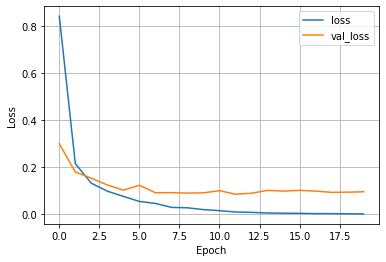

In [89]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)